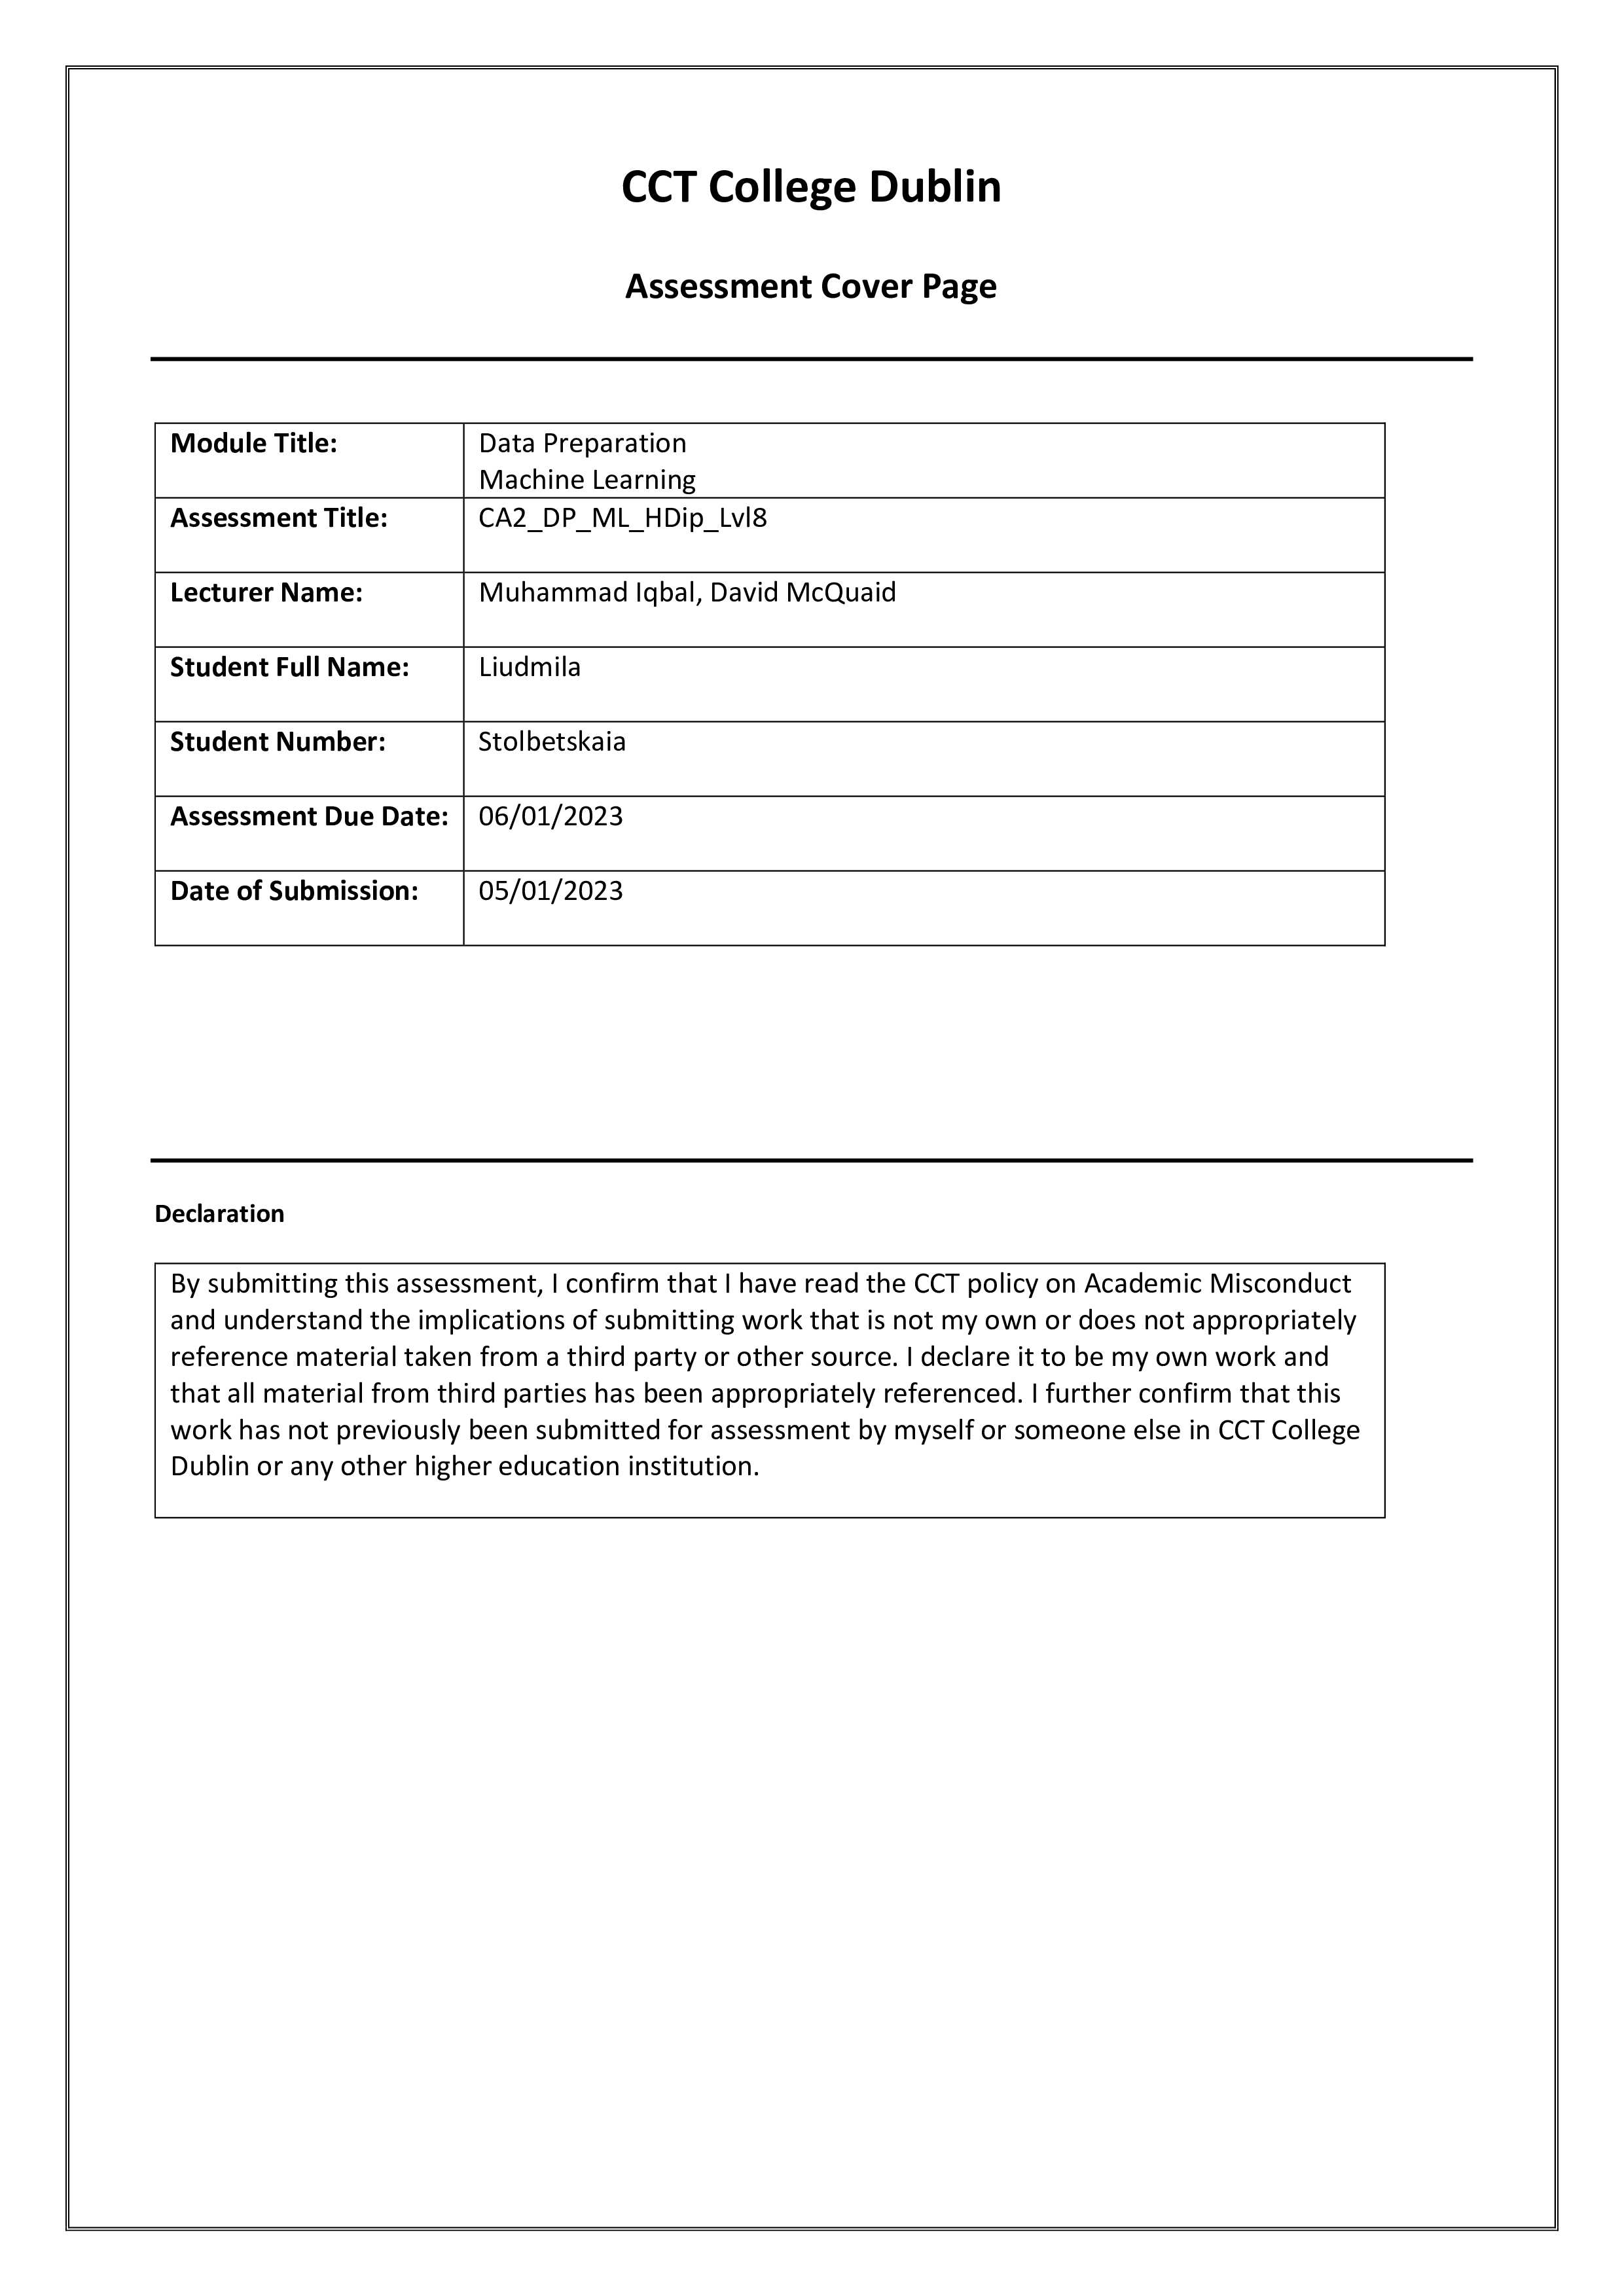

# Business understanding 
Online retailer, eBay is providing an option of bidding to their customers globally. Bidding is employed to
find the real price of items in the market based on the demand. The price offered by anyone participating in
this process is termed as a 'bid'. 

Normal bids are classified as ‘0’ bids in the data set and anomalous bids as ‘1’. Your goal is to use
classification or clustering algorithms to predict the bids in the future. You would need to clean and prepare
the dataset for the machine learning modelling under the following guidelines for Data Preparation and
Machine Learning modules.

>In this case it is higky impotrtand to recognze a customer behavior. To be particular 0 and 1 as they identify normal and anomalus behavior. So I need to have highly accurate (more thant 90% accuracy ) ML Model which will be able to recognise behaviur. 


# Data description and data underdtanding

It is alos one of the most important steps. I need to know what data could be essintial and what data is undesired. undesired data can bring noise to the model, decrise the accuracy, longer ML building and incirrect outcome. 

Data chould be chose according to bussness needs and problem that we are truing to solve.


**Attribute Information:**

**Record ID:** Unique identifier of a record in the dataset.

**Auction ID:** Unique identifier of an auction.

**Bidder ID:** Unique identifier of a bidder.

**Bidder Tendency:** A shill bidder participates exclusively in auctions of few sellers rather than a diversified lot. This is a collusive act involving the fraudulent seller and an accomplice.

**Bidding Ratio:** A shill bidder participates more frequently to raise the auction price and attract higher bids from legitimate participants.

**Successive Outbidding:** A shill bidder successively outbids himself even though he is the current winner to increase the price gradually with small consecutive increments.

**Last Bidding:** A shill bidder becomes inactive at the last stage of the auction (more than 90\% of the auction duration) to avoid winning the auction.

**Auction Bids:** Auctions with SB activities tend to have a much higher number of bids than the average of bids in concurrent auctions.

**Auction Starting Price:** a shill bidder usually offers a small starting price to attract legitimate bidders into the auction.

**Early Bidding:** A shill bidder tends to bid pretty early in the auction (less than 25\% of the auction duration) to get the attention of auction users.

**Winning Ratio:** A shill bidder competes in many auctions but hardly wins any auctions.

**Auction Duration:** How long an auction lasted.

**Class:** 0 for normal behaviour bidding; 1 for otherwis

# Libraries 
I will import libraries: 
- pandas

used to analyse, manipulate and clean a dataframe. Also  support operations like Sorting, Re-indexing, Iteration, Concatenation, Conversion of data, Visualizations, Aggregations, etc
- NumPy

used to support supports large matrices and multi-dimensional arrays 

- mathplotlib 

used to plot numerical data. Also plots high-defined figures like pie charts, histograms, scatterplots, graphs and so on

- seaborn

used for data visualisation and based on mathplotlib.  It gives a high-level interface for drawing presentable and informative graphics.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats.mstats import winsorize
%matplotlib inline  

In oreder to display a dataframe I will use 
 - pd.read_csv() function to read the csv file
 - head() function shows us number of rows that we want to see
 - shape() functiom shows number of rows and columns that the dataframe has

In [2]:
df_ebay = pd.read_csv("Shill Bidding Dataset.csv")

In [3]:
df_ebay.head(-5)

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6311,15115,760,s***l,0.028571,0.040000,0.0,0.057203,0.280000,0.993593,0.057203,0.000000,3,0
6312,15121,927,v***-,0.181818,0.095238,0.0,0.955694,0.142857,0.000000,0.955313,0.000000,1,0
6313,15123,760,c***e,0.111111,0.040000,0.0,0.569726,0.280000,0.993593,0.569726,0.000000,3,0
6314,15124,760,q***0,0.625000,0.200000,0.5,0.473063,0.280000,0.993593,0.431902,0.500000,3,0


In [4]:
df_ebay.shape

(6321, 13)

I am going to work with dataframe that consit of 13 colomns and 6321 rows. I have numerical and categorical features. Also, at this stage is clear to identify dependable variable which the class. In addition I already can say that I am working with classification broblem. 

I will go deeper in the analysis in the next stages. I am going to work with dataframe that consists of 13 columns and 6321 rows. I have numerical and categorical features. Also, at this stage is clear to identify dependable variables which the class. In addition, I am working with the classification problem. 

I will go deeper into the analysis in the following stages. 


### 1. Cleaning data and performing EDA

I am going to inspect the dataframe to find missing values and the type of data that we can have.
I will replace missing values and change data types in order to work with the dataframe.

I will use functions:
- isnull() - shows if the value is null (True)
- sum() - summarises the null values 


In [5]:
df_ebay.isnull().sum()

Record_ID                 0
Auction_ID                0
Bidder_ID                 0
Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
Class                     0
dtype: int64

### Visualisation of missing vlaues
I will also use visualisation techniques to display missing values. 
I will import missingo library to visualise the distribution of NaN values.

Note:
- pip install 
install the package in case if you do not have it


In [6]:
pip install missingno 

Note: you may need to restart the kernel to use updated packages.


In [7]:
import missingno as msno

<AxesSubplot:>

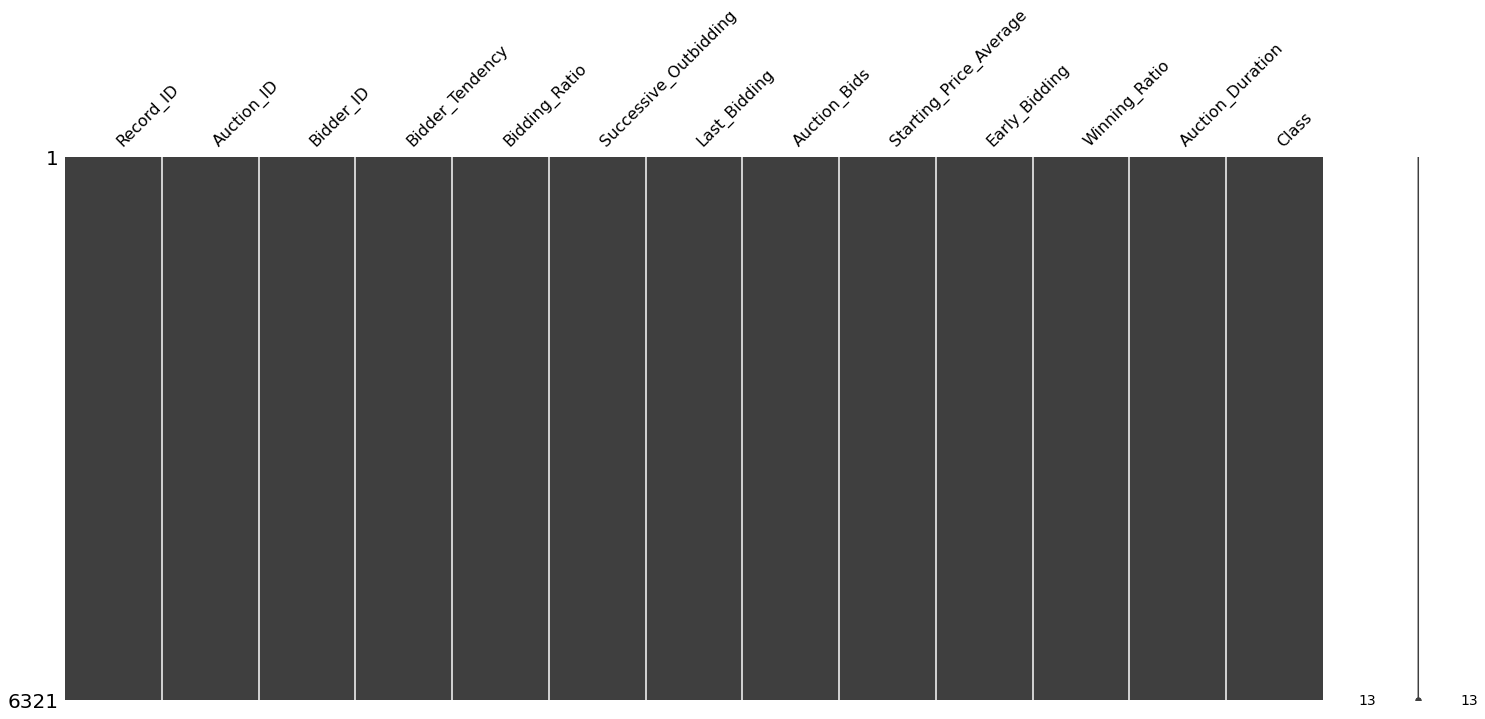

In [8]:
msno.matrix(df_ebay)


The dataset has **no missing values**. I can see that from null function used and from visualisation. It is perfect for me as I do not need to replace anything in the dataset. I can keep working on it.

### Data types and statistic
I will have a look at what type of data we have in the dataset in order to know if I need to change it. Values have to have proper datatype in order to perform them.
- dtypes() function shows the type of data I have.
- describe() function shows me statistical measures such as mean, median and std. I will be able to see if the data are following normal distribution or not. It will also says me if I need to normalise the features or not. I will describe it below. 


In [9]:
df_ebay.dtypes

Record_ID                   int64
Auction_ID                  int64
Bidder_ID                  object
Bidder_Tendency           float64
Bidding_Ratio             float64
Successive_Outbidding     float64
Last_Bidding              float64
Auction_Bids              float64
Starting_Price_Average    float64
Early_Bidding             float64
Winning_Ratio             float64
Auction_Duration            int64
Class                       int64
dtype: object

**Bidder_ID** saved as an object. I will not to transform the feature as id in general do not important for ML model performances. I might symply drop it the same as "Record_ID" and "Auction_ID"


In [10]:
df_ebay.describe()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,7535.829457,1241.388230,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,4364.759137,735.770789,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,1.000000,5.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3778.000000,589.000000,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,7591.000000,1246.000000,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,11277.000000,1867.000000,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,15144.000000,2538.000000,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


We can see that most of the features in the dataframe have range from 0 to 1 except of "Action Duration", which is normal as describe how long an auction lasted. 

We have a few colums which follows normal distribution: "Last Bidding" and "Action Duration"
Also I can see that Class has values 0 and 1. From mean we can see that the data is imbalance m = 0.1. 

### Lable
The lable in the dataframe is Class and I will visualise 0 for normal behaviour bidding 1 for otherwise.

I will use unique function to see the unique values in the feature. 
- unique()

I will also visualise values to see which classes we have more
- countplot() function will plot the values and count htem as well

In [11]:
df_ebay["Class"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='Class', ylabel='count'>

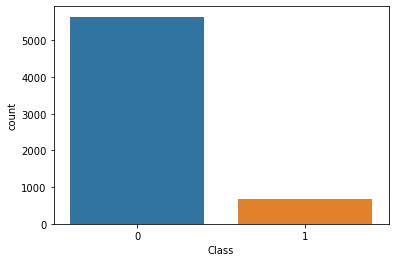

In [12]:
sns.countplot(x=df_ebay["Class"])

As I mentioned before I am working with **binary classification**. 
It is clear to see **I have the imbalanced label**. It is not good for us to work with imbalance data as an ML model will not be able to recognise true and false values well. So it will not give the accurate performance of the ML model. I will **apply SMOTE technique** later before running the ML model.

### Dependable features 

I will visualise the dependable features to disply the distribution and outliers that the features might have


I will save all the features except class in the df_hist variable and use 
- hist() function to visualise the features 

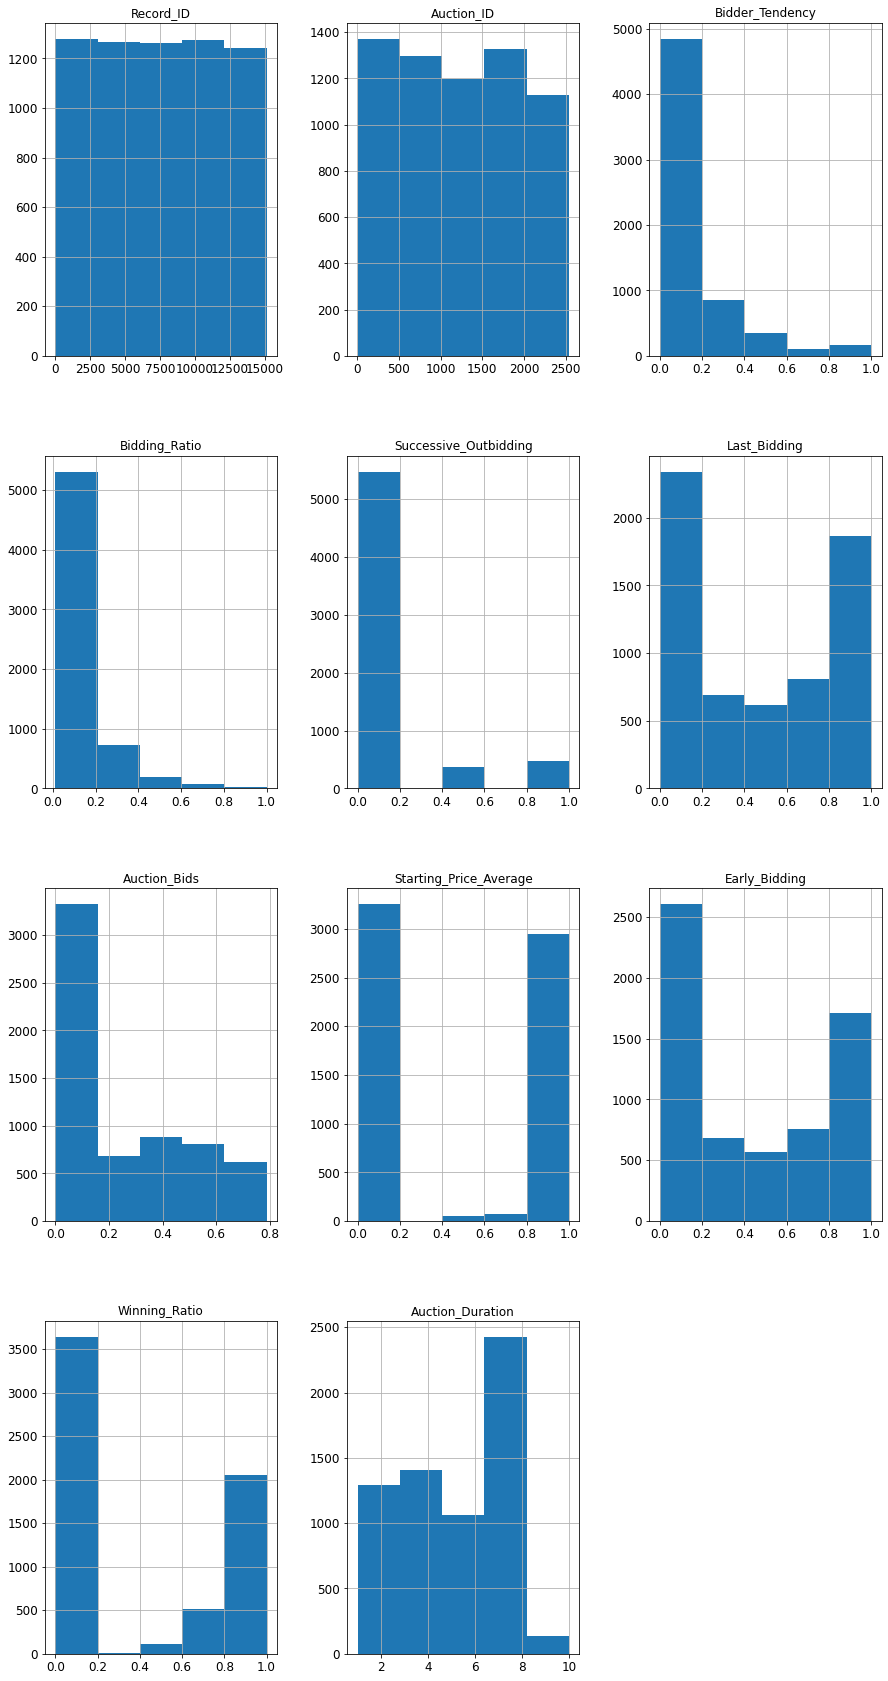

In [13]:
df_hist = df_ebay.drop(columns='Class')
df_hist.hist(figsize=(15,30),bins=5,xlabelsize=12,ylabelsize=12);

It is noticeable that the features mostly do not follow the normal distribution as I already mentioned before. 
The feature "Successive_Outbidding" seems to me as it has unique values. I will visualise it separately. "Bidder_Tendency" and "Bidding_Ratio" seem to have outliers as there are drastically different data points form the majority of the data. In addition both of them right skewed 


### Outliers 
The best way to find the outliers and distribution of data is to create a boxplot. I will create the boxplot for each feature in the datframe. It is highly important to identify outliers as they bring noise and they are far away from the majority of data. So if we do not want put "rubbish" in. It is better to find them and to perform some techniques to remove them or replace them. Both ways could be used. However, I would rather to replace them as it considers the most appropriate method when we deal with outliers. 

I will use:
- seaborn library 
- boxplot() function to plot the data. I will be able to see the distribution, quartiles and outliers

I will go through all the dependable features except IDs as I am planning to drop them in the future.
 

<AxesSubplot:xlabel='Bidder_Tendency'>

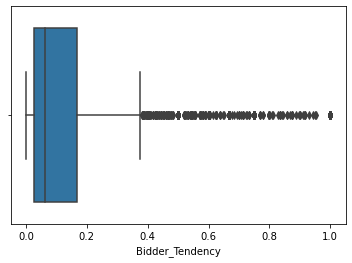

In [14]:
sns.boxplot(x = df_ebay["Bidder_Tendency"])

<AxesSubplot:xlabel='Bidding_Ratio'>

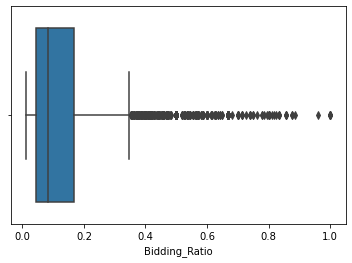

In [15]:
sns.boxplot(x = df_ebay["Bidding_Ratio"])

<AxesSubplot:xlabel='Successive_Outbidding'>

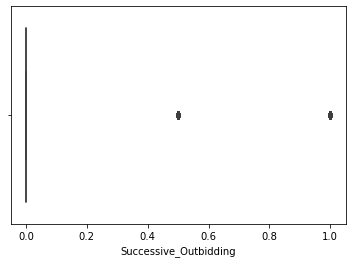

In [16]:
sns.boxplot(x = df_ebay["Successive_Outbidding"])

In [17]:
df_ebay["Successive_Outbidding"].unique()

array([0. , 1. , 0.5])

<AxesSubplot:xlabel='Successive_Outbidding', ylabel='count'>

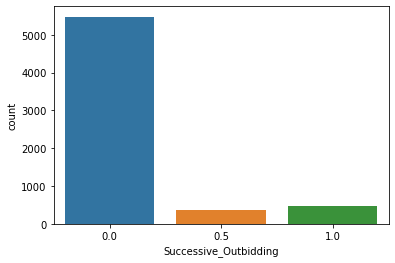

In [18]:
sns.countplot(x= df_ebay["Successive_Outbidding"])

In [19]:
df_ebay["Successive_Outbidding"].value_counts()

0.0    5478
1.0     469
0.5     374
Name: Successive_Outbidding, dtype: int64

From the histogram representation, we could see that the feature has only 3 bars so it was the reason why I have the boxplot representation in the way as there are outliers. However, from the countplot we can see that Successive_Outbidding has only 3 values (0.0, 0.5 and 1.0). 

<AxesSubplot:xlabel='Last_Bidding'>

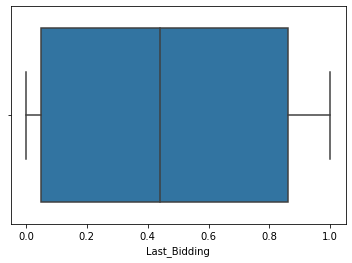

In [20]:
sns.boxplot(x = df_ebay["Last_Bidding"])

<AxesSubplot:xlabel='Auction_Bids'>

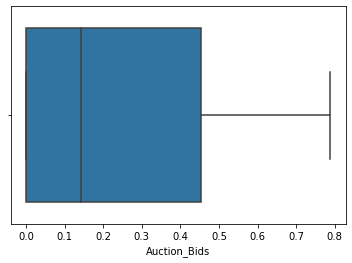

In [21]:
sns.boxplot(x = df_ebay["Auction_Bids"])

<AxesSubplot:xlabel='Starting_Price_Average'>

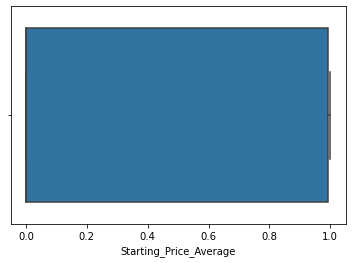

In [22]:
sns.boxplot(x = df_ebay["Starting_Price_Average"])

<AxesSubplot:xlabel='Early_Bidding'>

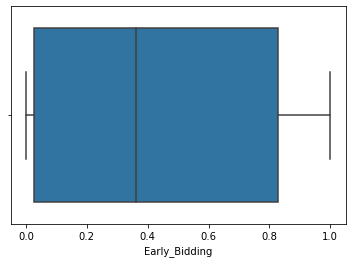

In [23]:
sns.boxplot(x = df_ebay["Early_Bidding"])

<AxesSubplot:xlabel='Winning_Ratio'>

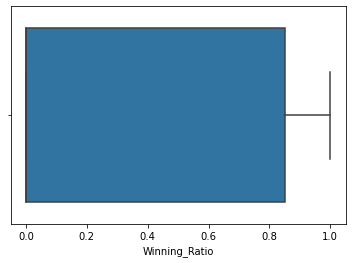

In [24]:
sns.boxplot(x = df_ebay["Winning_Ratio"])

<AxesSubplot:xlabel='Auction_Duration'>

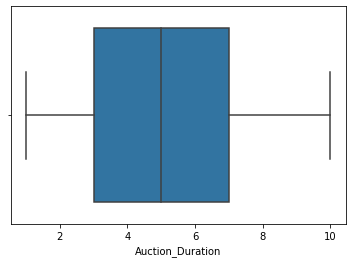

In [25]:
sns.boxplot(x = df_ebay["Auction_Duration"])

From the observation I can say that I will remove outliers from features "Bidder_Tendency" and "Bidding_Ratio". The features that I have mostly do not follow the normall distribution so I will have to normalise them. I addition I will ballance the lable as it clear to see that the data is imbalanced. 

# Feature engineering 


### Dropping undesired columns 
I will drop id columns as they do not play any rolle in the analysis. They only represent uinique identifier
- drop()function will drop the columns
- info() function to display the features and datatypes

In [26]:
to_drop = ["Record_ID", "Auction_ID", "Bidder_ID"]

In [27]:
df_ebay.drop(to_drop, inplace = True, axis = 1)

In [28]:
df_ebay.head(-5)

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
...,...,...,...,...,...,...,...,...,...,...
6311,0.028571,0.040000,0.0,0.057203,0.280000,0.993593,0.057203,0.000000,3,0
6312,0.181818,0.095238,0.0,0.955694,0.142857,0.000000,0.955313,0.000000,1,0
6313,0.111111,0.040000,0.0,0.569726,0.280000,0.993593,0.569726,0.000000,3,0
6314,0.625000,0.200000,0.5,0.473063,0.280000,0.993593,0.431902,0.500000,3,0


In [29]:
df_ebay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Bidder_Tendency         6321 non-null   float64
 1   Bidding_Ratio           6321 non-null   float64
 2   Successive_Outbidding   6321 non-null   float64
 3   Last_Bidding            6321 non-null   float64
 4   Auction_Bids            6321 non-null   float64
 5   Starting_Price_Average  6321 non-null   float64
 6   Early_Bidding           6321 non-null   float64
 7   Winning_Ratio           6321 non-null   float64
 8   Auction_Duration        6321 non-null   int64  
 9   Class                   6321 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 494.0 KB


I have at the moment the dataframe with numerical features without ids data.

### Outliers

On the visualisation above we could see outliers. However I will also count them in order to know how many  have. 

I will defind a function which will go through the features and brings the number of them by interquntile range. It is one of techiques used to identyfy outliers. It will shows the outliers before the first quntile and after the third quntile.

In [30]:
def sum_outliers(X):
    """Outliers are calculated according to the matplotlib.pyplot's standards."""
    IQR = np.quantile(X, q=0.75) - np.quantile(X, q=0.25)
    upper_whisker = np.quantile(X, q=0.75) + (IQR * 1.5)
    lower_whisker = np.quantile(X, q=0.25) - (IQR * 1.5)
    return (X > upper_whisker).sum() + (X < lower_whisker).sum()

I will create a loop which will go through sum of outliers that I have calculated already and bring the number of outliers in 'Bidder_Tendency'

In [31]:
column_names= ['Bidder_Tendency']

for i in column_names:
    if sum_outliers(df_ebay[i])>0:
        print('Number of outliers in {} column: {}'.format(i ,sum_outliers(df_ebay[i])))

Number of outliers in Bidder_Tendency column: 628


 ### Winsorization
> Winzorization is the method of replacing extreme values(outliers). I tlimits effect of them. It changes the outlier value so that it is close to other values in the set (Dixon, 1960, pp.385–391). The mean value calculated after such replacement of the extreme values is called winsorized mean. 

> **Decide how much Winsorization we want**.
This is specified as a total percentage of untouched data. 
For example, if I want to Winsorize the top 5% and bottom 5% of data points, this is equal to 100% – 5% – 5% = 90% Winsorization. A 80% Winsorization means that 10% is modified from each tail area.


<br>I will winsorize 10% of the highest values and 10% of the lowest value of the array as it gives me better result.
- winzorize() function is used to perform the method </br>

**Outliers "Bidder_Tendency"**

In [32]:
def sum_winsorize_outliers(X):
    """Outliers are calculated according to the matplotlib.pyplot's standards."""
    X= winsorize(X, (0.10, 0.10)) #winsorization of the given column
    IQR = np.quantile(X, q=0.75) - np.quantile(X, q=0.25)
    upper_whisker = np.quantile(X, q=0.75) + (IQR * 1.5)
    lower_whisker = np.quantile(X, q=0.25) - (IQR * 1.5)
    return (X > upper_whisker).sum() + (X < lower_whisker).sum()

In [33]:
column_names= ['Bidder_Tendency']

for i in column_names:
    if sum_outliers(df_ebay[i])>0:
            print('Number of outliers in {} column: {}'.format(i ,sum_winsorize_outliers(df_ebay[i])))

Number of outliers in Bidder_Tendency column: 0


The method replaced the outliers. I will apply the function and save it in the variable. 
Also I will use **boxplot()** to visualise the result

In [34]:
df_ebay['Bidder_Tendency'] = winsorize(df_ebay['Bidder_Tendency'], (0.10, 0.10))

C:\Users\Windows 10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bidder_Tendency'>

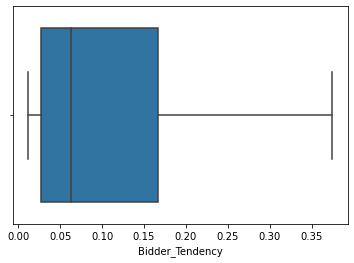

In [35]:
sns.boxplot(df_ebay['Bidder_Tendency'])

The visualisation also shows no outliers in the feature.
The outliers have been successfully replaced.

**Outliers "Bidding_Ratio"**

I willuse winsorization for "Bidding_Ratio" as well


In [36]:
def sum_winsorize_outliers(X):
    """Outliers are calculated according to the matplotlib.pyplot's standards."""
    X= winsorize(X, (0.10, 0.10)) #winsorization of the given column
    IQR = np.quantile(X, q=0.75) - np.quantile(X, q=0.25)
    upper_whisker = np.quantile(X, q=0.75) + (IQR * 1.5)
    lower_whisker = np.quantile(X, q=0.25) - (IQR * 1.5)
    return (X > upper_whisker).sum() + (X < lower_whisker).sum()

In [37]:
column_names= ['Bidding_Ratio']

for i in column_names:
    if sum_outliers(df_ebay[i])>0:
        print('Number of outliers in {} column: {}'.format(i ,sum_winsorize_outliers(df_ebay[i])))

Number of outliers in Bidding_Ratio column: 0


In [38]:
df_ebay['Bidding_Ratio'] = winsorize(df_ebay['Bidding_Ratio'], (0.10, 0.10))

C:\Users\Windows 10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bidding_Ratio'>

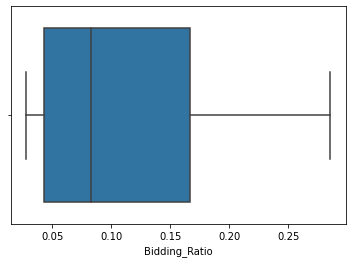

In [39]:
sns.boxplot(df_ebay['Bidding_Ratio'])

The visualisation shows the feature 'Bidding_Ratio' has no outliers. 
So it this stage the dataset has no outliers and missing values 

### Normalization 
> Normalisation is a method of features transforming to a scale from o to 1. Normalization is used in case there are no outliers as it can not deal with them. The scaling of the features is needed in order to bring them to the same scale.
It is highly important for ML building to scale the data in an appropriate way with suitable scaling. Having different measurement scales will bring a problem when we attempt to combine differnt values for ML building.

<br>I have the dataset where most of the features lie on a scale from 0 to 1. In this scenario, I will apply normalization on "Auction_Duration". The feature is out of the measurement scale that I have in the dataset. </br>

I will use describe function to display the dataframe to see the variables.

To perform the method I will use:
- MinMaxScaler()



In [40]:
df_ebay.describe()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,0.116481,0.112119,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,0.118529,0.083882,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,0.011628,0.027778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,0.375000,0.285714,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


In [41]:
scaled_column = ["Auction_Duration"]#column to scale

from sklearn.preprocessing import MinMaxScaler # importing MinMaxScaler from sklearn
scaler = MinMaxScaler()
df_ebay[scaled_column] = scaler.fit_transform(df_ebay[scaled_column])

In [42]:
df_ebay.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,0.200000,0.285714,0.0,0.000028,0.0,0.993593,0.000028,0.666667,0.444444,0
1,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,0.444444,0
2,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,0.444444,0
3,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,0.444444,0
4,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,0.666667,0


By the head() function I displayed the dataframe after scaling. "Auction_Duration" has been scaled from 0 to 1. So all the features are on the same scale[0,1]

### Feature Importance
It is important for the analysis to understand what features should be taken into ML model. Some of the features can be highly important. Some features does nit bring any information and only bring undesired nise into the model. 

**Correlation Matrix** is one of the usful tool to identify feature importance. The hifhly correlated features will let to prioritise which feature will be taken for ML model. For example if we have high correlation between two varaible, one of the features could be droped as it is not bring additional inforamtion.

In [43]:
df_ebay.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,0.200000,0.285714,0.0,0.000028,0.0,0.993593,0.000028,0.666667,0.444444,0
1,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,0.444444,0
2,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,0.444444,0
3,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,0.444444,0
4,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,0.666667,0


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_11556\1487335332.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like( df_ebay.corr(method = "pearson"), dtype=np.bool))


<AxesSubplot:>

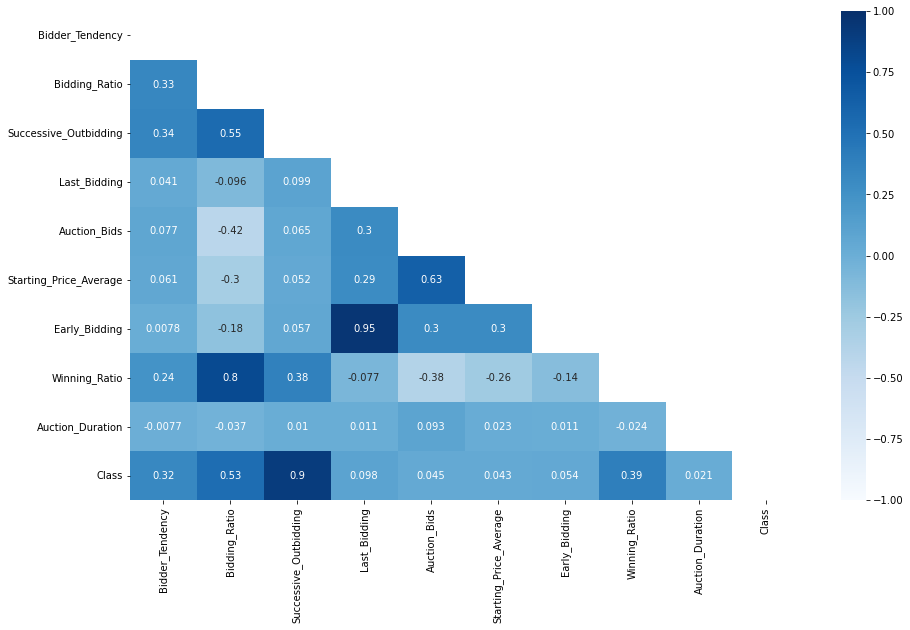

In [44]:
plt.figure(figsize = (15,9))
 
correlation = df_ebay.corr().round(2)
top_corr_features = correlation.index

mask = np.triu(np.ones_like( df_ebay.corr(method = "pearson"), dtype=np.bool))

sns.heatmap(df_ebay[top_corr_features].corr(),mask=mask, vmin=-1, vmax=1, annot = True, cmap = 'Blues')

It is a very simple way to see what features are important or not to build ML Model. I could drop "Successive_Outbidding", "Winning_Ratio" or "Bidding_Ratio", "Last_Bidding" or "Early_Bidding". The choice of the features also depends on the threshold set for the correlation 

"Successive_Outbidding" is an interesting feature as it shows if the action was successful or not. And it has 3 categories 0, 0.5, 1. It is also shows as normal and abnormal behaviour.

However, I will perform PCA and LDA that will choose the most important features by the algorithm build  in. 

# Dimensionality reduction

Dimensionality reduction is highly usful techniques that helps us to reduce number of features.

>PCA: Principal Component Analysis. It is an unsupervised dimensionality reduction algorithm used to extract information form highly-dimensional space. It projects squeezed data into a lower-dimensional sub-space

>LDA: Linear Discriminant Analysis. It is a supervised dimensionality reduction algorithm used for modelling differences in groups i.e.form highly-dimensional space to a lower dimension space. 

### PCA

I will perform PCA first.
I will split the dataset into dependable(X) and indepndent variables(y). 

- .PCA() 
is the algorithm used for PCA analysis 
- .cumsum() 
return the cumulative sum of the elements along a given axis.
- .explained_variance_ratio_
percentage of variance explained by each of the selected components

In [45]:
X = df_ebay.iloc[:,0:9]  #independent columns
y = df_ebay.iloc[:,-1]

In [46]:
X,y

(      Bidder_Tendency  Bidding_Ratio  Successive_Outbidding  Last_Bidding  \
 0            0.200000       0.285714                    0.0      0.000028   
 1            0.024390       0.200000                    0.0      0.013123   
 2            0.142857       0.200000                    0.0      0.003042   
 3            0.100000       0.200000                    0.0      0.097477   
 4            0.051282       0.222222                    0.0      0.001318   
 ...               ...            ...                    ...           ...   
 6316         0.333333       0.160000                    1.0      0.738557   
 6317         0.030612       0.130435                    0.0      0.005754   
 6318         0.055556       0.043478                    0.0      0.015663   
 6319         0.076923       0.086957                    0.0      0.068694   
 6320         0.016393       0.043478                    0.0      0.340351   
 
       Auction_Bids  Starting_Price_Average  Early_Bidding  Wi

In [47]:
from sklearn.decomposition import PCA

pca = PCA(0.990).fit(X)
number = pca.n_components_
print('The number of components is: ', number)

The number of components is:  7


The algorithm gives 7 number of components that could be used for the future ML model building based on the variance ratio. The variance ratio set on 90% which is generaly anough


Text(0, 0.5, 'Cumulative explained variance')

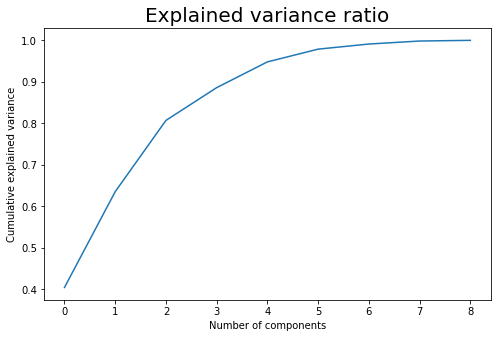

In [48]:
plt.rcParams["figure.figsize"] = (8,5)

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained variance ratio', fontsize = 20)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [49]:
pca = PCA(7)
projected = pca.fit_transform(X)

In [50]:
projected.shape

(6321, 7)

In [51]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.40478882, 0.23075773, 0.17163461, 0.07892562, 0.06201722,
       0.03070961, 0.01231184])

At his stage we have the dataset with only 7 features.
The first 3 feature contains the majority of the data (80%).
The last 3 features containes the minority of the data (20%).
### PCA DataFrame
<br>I will join depenadable feature "y" and display new dataset</br>

In [52]:
df_components = pd.DataFrame(projected, columns = ['F1','F2','F3','F4','F5','F6','F7'])
df_pca = df_components.join(y, how='outer')
df_pca.head(-5)

,F1,F2,F3,F4,F5,F6,F7,Class
0,-0.258933,-0.323278,0.706410,-0.037982,-0.324248,0.244063,0.104503,0
1,-0.333241,-0.150509,0.825282,-0.046396,-0.447672,0.189720,-0.091730,0
2,-0.361052,-0.117554,0.870358,-0.046120,-0.453199,0.170872,0.020729,0
3,-0.274318,-0.033520,0.813805,-0.047774,-0.464531,0.177633,-0.020271,0
4,-0.812221,-0.193966,-0.045783,0.262931,-0.098028,0.045923,-0.035382,0
...,...,...,...,...,...,...,...,...
6311,0.103988,-0.770155,0.319689,-0.213036,-0.021161,0.112512,-0.064455,0
6312,0.264414,0.340681,-0.834697,-0.375818,0.159673,-0.006966,0.105378,0
6313,0.574278,-0.297273,0.038892,-0.218326,-0.046459,0.132029,0.021800,0
6314,0.285706,0.080158,0.566740,-0.168899,0.247235,0.134825,0.192819,0


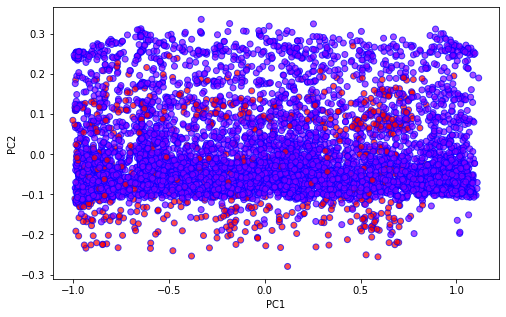

In [53]:
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(
    projected[:,0],
    projected[:,6],
    c=y,#traget 
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

We can see that all the data overlaped and it does not have claer separation. 

### LDA
To perform the LDA I will import:
- LinearDiscriminantAnalysis() from sklearn
- fit_transform()  fit and transform the input data at the same time and converts the data points.

A number of components will = 1 as I wirk with binary classification. So we can only use one. If we had 3 classes we could use 2 components.

In [54]:
# apply Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X,y)

In [55]:
lda.explained_variance_ratio_

array([1.])

In [56]:
df_comp = pd.DataFrame(X_lda,  columns = ['F1_LDA'])
df_lda = df_comp.join(y, how='outer')
df_lda.head(-5)

,F1_LDA,Class
0,-0.688329,0
1,-0.641413,0
2,-0.610325,0
3,-0.607700,0
4,-0.799931,0
...,...,...
6311,-1.018986,0
6312,-0.993831,0
6313,-0.968814,0
6314,3.280463,0


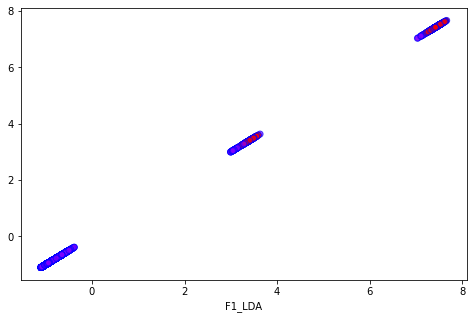

In [57]:
plt.xlabel('F1_LDA')
plt.scatter(
    X_lda[:,0],
    X_lda[:,-1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

After LDA we have only 2 columns. The visualisation of the features does not represent useful information, It looks like separated linrar regression.

**In this case the best option to use is LDA technique. The algorithm has been created for this specific purpuse to maximizes class separability. I will use LDA as my goal is classification. As I have labled dataset it is alos the most siutable option at this case. I will apply supervised ML models as well as we will train model by the lable that we have.**  


<br>I will apply SMOTE technique on top of the LDA as I have new dtatsets.</br>





### SMOTE (Synthetic Minority Oversampling Technique)
> SMOTE is one of the tequnique used to solve the problem with imbalnced classes. It is balance class distribution by randomly increasing minority class examples by replicating them.The algorithm randomly selects one or more of the k-nearest neighbors for each example in the minority class. 

Machine Learning algorithms increase accuracy by reducing the error, they do not consider the class distribution. Some of the ML models  more likely  only to predict the majority class, it leads to have major misclassification of the minority class to compare with the majority class. 

<br>The visualisation of the classes above shows that data is imblanced. In this case 0 class is the major and 1 is the minor.I will apply the tequnique in order to ballnce the classes. </br>

- SMOTE()
- make_classification()

are used for normalizing classification


pip install imblearn

In [58]:
# conda install -c conda-forge imbalanced-learn
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE

In [59]:
from sklearn.model_selection import train_test_split

from collections import Counter
from sklearn.datasets import make_classification

X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, 
                           n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))
sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

In [60]:
df_lda.Class.value_counts()

0    5646
1     675
Name: Class, dtype: int64

In [61]:
X = df_lda.iloc[:,:1]  #independent columns
y = df_lda.iloc[:,-1]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.70, 
                                                           random_state = 1, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4424, 1), (1897, 1), (4424,), (1897,))

In [62]:
X.values

array([[-0.68832864],
       [-0.64141346],
       [-0.61032502],
       ...,
       [-0.96344069],
       [-0.9316426 ],
       [-0.94208174]])

In [63]:
y.values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
y_train.value_counts()

0    3952
1     472
Name: Class, dtype: int64

In [65]:
# SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

smt = SMOTE()

X_train, y_train = smt.fit_resample(X_train, y_train)

In [66]:
np.bincount(y_train) #  method counts the occurrence of each element. Each bin value is the occurrence of its index

array([4234, 4234], dtype=int64)

C:\Users\Windows 10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

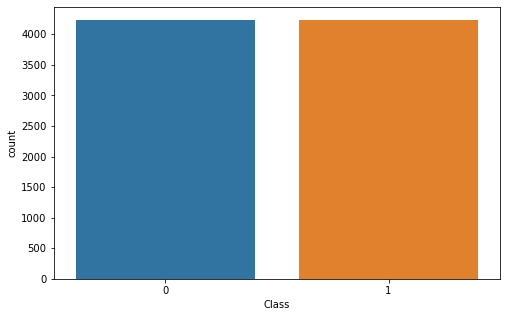

In [67]:
sns.countplot(y_train)

I have a balanced label at this stage. It will improve the model prediction and class recognition to train ML model. 

# Machine Learning Implementation

   Based on my findings I would rather to say that I will be applying supervised ML learning models as I have defined labels. As far as we know supervised ML models are mostly used when we have labelled data. It will be applicable in this case as well. I will train the model on the data that we have. The model will be told what belongs to classes 0 and 1. After the training, the ML model will be able to identify what is normal behaviour and what is not.
   
Machine Learning Models for classification problem:
I will apply a few ML models to see which one will give me the best performance. 

I will import libraries for ML models performance 


In [68]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

### Decision tree

It is one of the most poerfull and popular alogirithms for classification problem. 
The algorithm has a tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. I will use this agorith as it can better recognise classes. 

The algorithm is widely used in busness when it come to identyfy perctive custome, in bankinking where the task is identifing froud and so on. 

**Hyperparameters** 

- kfolds 
It is evaluation of the ML model peformens. It is more stable and thorough than using a split into a training and a test set. The most commonly used is Kfold validation. The "k" is
a user-specified number (usually usualy from 5 or 10) When performing five-fold cross-validation,
the data is partitioned into five parts of approximately equal size. 
I will use diferent number of kfold. 

- max_depth 
The maximum depth of a binary tree is the number of nodes from the root that goes down to the furthest leaf of the node. It indicates hoe deep the disition tree can be. As deeper the tree as more information it could cuptue. It is important to find a good match as the model could be overfited.  It is one of the most important hyperparameters when it comes to increasing the accuracy of the model.

- Min_samples_leaf
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches.


________________________________________________________________________________________________________________________

**GridSearchCV**

The aproach is evaluated for a range of hyperparameter values. This technique will construct many versions of the model with all possible combinations of hyperparameters and will return the best one. 


I will set Hyperparameters in optimal range from 1 to 20. The techique will give me the croorect number of estimators.



In [69]:
# k fold cross validatio
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score 
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV

In [70]:
DT = DecisionTreeClassifier(random_state = 0)

DT.fit(X_train, y_train)
y_pred_DT = DT.predict(X_test)

In [71]:
depth = range(1, 20)
leaf = range(1, 20)

In [72]:
grid = dict(max_depth=depth,min_samples_leaf=leaf)
grid_search = GridSearchCV(estimator=DT, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [73]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.981649 using {'max_depth': 5, 'min_samples_leaf': 5}


In [74]:
DT = DecisionTreeClassifier(max_depth = 5, min_samples_leaf=5, random_state = 0)# max deep for the performance is 5 
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)#cross-validation by Kfold technic

DT.fit(X_train, y_train)
y_pred_DT = DT.predict(X_test)

cvs_DT = cross_val_score(estimator = DT, X = X_train, y = y_train, cv = kfold, scoring='accuracy')

print('Training Accuracy: {:.3f}'.format(DT.score(X_train,y_train)))
print('Testing Accuracy: {:.3f}'.format(DT.score(X_test,y_test)))


Training Accuracy: 0.989
Testing Accuracy: 0.982


<AxesSubplot:>

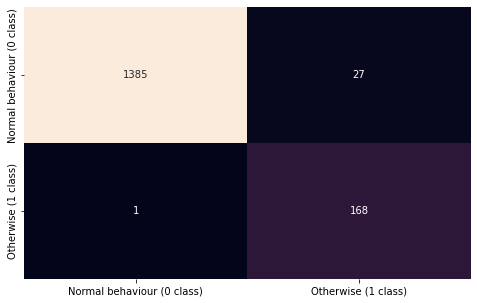

In [75]:
#confusion matrix 
cm = confusion_matrix(y_test, y_pred_DT)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True, fmt='.4g',                 
                 xticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                
                 yticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                  
                 cbar=False)

In [76]:
print("Percent of accuracy: ", cvs_DT) 
print()
print("Mean Accuracy :", cvs_DT.mean(), "\nStandard Deviation :", cvs_DT.std())
print()
print("Classification Report: ", classification_report(y_test, y_pred_DT))

Percent of accuracy:  [0.98229044 0.99291617 0.98937426 0.98347107 0.98347107 0.98701299
 0.98937426 0.99173554 0.99408983 0.98463357]

Mean Accuracy : 0.9878369212992038 
Standard Deviation : 0.004057694369465139

Classification Report:                precision    recall  f1-score   support

           0       1.00      0.98      0.99      1412
           1       0.86      0.99      0.92       169

    accuracy                           0.98      1581
   macro avg       0.93      0.99      0.96      1581
weighted avg       0.98      0.98      0.98      1581



I set kfold for 10 as it gave optimal performance. The k-folds estimate the skill of the model on new data.

Acuraccy if the model: 0.98% that is very high

The matrix shows high preformane in the recognition of 0 class (1383) identified correctly and only (28) incorrect. 
Also I can say how good it is recognze 1 class (168) identified correctly and only (1) is incorrect.  

Metrics such as precision, recall and f1-score have high performance. I can conclude the ML modle has highly accorate result. It is able identudy classes with high aquarcy. 

### ANN 
I desided to choose one of the deep learning algorithms to see how it perform to compare with regular alogorithm. Neural Network algorithm highly used when we have latge aount of data to support ML performance. 

Neural Network works identicaly as a human brain. We learn objets around and identyfing them.However, we need to be told what is the object to be able to recognise it in the future. The same as the algorithm. We can tell the agorithm what is 0 and 1. Aftre the training the algorithm will be able to identyfy classes.  

**ANN (An Artificial Neural Network)** consists of Neurons which in turn are responsible for creating layers. These Neurons are also known as tuned parameters. The output from each layer is passing to the next layer. There are different nonlinear activation functions to each layer. It helps in the learning process and the output of each layer. 

**Hyperparamters**

- input_dim
It is the first layer. It has a number of features of the data frame

- dense
It is the first layer where input from the first layer passes and creates fully connected nodes. It is also, applied to the output. 

- Epoch  
It indicates the number of passes that the machine learning algorithm has completed during that training. The task with a complex level of prediction requires more neurons. The number of neurons range is set to be from 10 to 100. I will use 100 in my case as I have a huge amount of data. 

- loss 
It is used to evaluate weights for the different layers. The optimiser adjusts the learning rate and goes through various sets of weights. In this case, we will use Binary Cross Entropy.  

- Adam
In the case of the optimizer, we will use ADAM which is an efficient stochastic gradient descent algorithm.


In [85]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [86]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

ANN_model = Sequential()

In [87]:
# Let's add the first hidden layer:
from keras.layers import Dense

# Add the first hidden layer
ANN_model.add(Dense(1, activation = 'relu', input_dim = 1)) # I have only one column

# Let's add our second hidden layer:
# Add the second hidden layer
ANN_model.add(Dense(15, activation = 'relu')) # We define a new dense layer
ANN_model.add(Dense(10, activation = 'relu'))

# Now we add the output layer as follows:
# Add the output layer
ANN_model.add(Dense(1, activation = 'sigmoid')) # We apply the dense layer to the data
#sigmoid function always returns a value between 0 and 1

In [80]:
#Compile
ANN_model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

#fit function
ANN_model.fit(X_train, y_train, epochs = 100)


Epoch 1/10
265/265 [==============================] - 1s 1ms/step - loss: 0.4958 - accuracy: 0.8074
Epoch 2/10
265/265 [==============================] - 0s 1ms/step - loss: 0.2840 - accuracy: 0.9848
Epoch 3/10
265/265 [==============================] - 0s 1ms/step - loss: 0.2294 - accuracy: 0.9848
Epoch 4/10
265/265 [==============================] - 0s 1ms/step - loss: 0.1936 - accuracy: 0.9848
Epoch 5/10
265/265 [==============================] - 0s 1ms/step - loss: 0.1671 - accuracy: 0.9848
Epoch 6/10
265/265 [==============================] - 0s 1ms/step - loss: 0.1468 - accuracy: 0.9848
Epoch 7/10
265/265 [==============================] - 0s 1ms/step - loss: 0.1309 - accuracy: 0.9848
Epoch 8/10
265/265 [==============================] - 0s 1ms/step - loss: 0.1184 - accuracy: 0.9848
Epoch 9/10
265/265 [==============================] - 0s 1ms/step - loss: 0.1084 - accuracy: 0.9848
Epoch 10/10
265/265 [==============================] - 0s 1ms/step - loss: 0.1004 - accuracy: 0.9848

In [81]:
scores = ANN_model.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = ANN_model.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

265/265 [==============================] - 0s 796us/step - loss: 0.0969 - accuracy: 0.9848
Training Accuracy: 98.48%

50/50 [==============================] - 0s 822us/step - loss: 0.0752 - accuracy: 0.9722
Testing Accuracy: 97.22%



50/50 [==============================] - 0s 602us/step


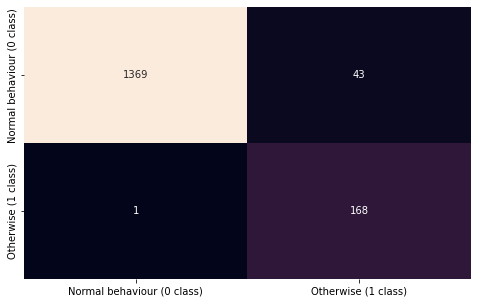

In [82]:
from sklearn.metrics import confusion_matrix
y_pred_ANN = ANN_model.predict(X_test)
y_pred_ANN  = y_pred_ANN.flatten()

y_pred_ANN_new = np.where(y_pred_ANN.round(2) > 0.5, 1, 0)

c_matrix = confusion_matrix(y_test, y_pred_ANN_new)

ax = sns.heatmap(c_matrix, annot=True, fmt='.4g',                                  
                 xticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                
                 yticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                  
                 cbar=False)


In [83]:
print("Classification Report: ", classification_report(y_test, y_pred_ANN_new))

Classification Report:                precision    recall  f1-score   support

           0       1.00      0.97      0.98      1412
           1       0.80      0.99      0.88       169

    accuracy                           0.97      1581
   macro avg       0.90      0.98      0.93      1581
weighted avg       0.98      0.97      0.97      1581



The matrix shows high performance in the recognition of 0 class (1369) identified correctly and only (43) incorrect. 
Also, I can say how good it is to recognise 1 class (168) identified correctly and only (1) is incorrect.  

Metrics such as precision, recall and f1-score have high performance. I can conclude the ML model has a highly accurate result. It can identify classes with high accuracy. 


__________________________________________________________________________________________________________________________

<center> Comapration of the models <center>

| <center> **Comparative characteristics**  <center>   |  <center> **DecisionTree** <center>  |  <center> **ANN**  <center> |  
| ----------- | ----------- | ----------- |
| <center> Number of used hyperparameters  <center>    | <center> 2  <center>     | <center> 5 <center> | 
| <center> Training accuracy  <center>  | <center> 0.989 <center>        | <center> 0.984 <center> | 
| <center> Testing accuracy  <center>  | <center> 0.980 <center>        | <center> 0.972 <center> | 
| <center> Type I error  <center>  | <center> 27 <center>        | <center> 43 <center> |
| <center> Type II error  <center>  | <center> 1 <center>        | <center> 1 <center> |
    
> I can conclude that both ML models have very good performance. However the performance of DecisionTree has slightly higher result. It can recognice the classes with higher accuracy. Also, testing accuracy is slightly higher as well. 

# Conclusion

I have got the business understanding and the problem which should be solved. The classification problem has been defined and solved by ML Models. I applied visualisation and cleaning techniques to clean the data. Scaled a few features to bring them to the same scale as other features in the data frame. I used feature importance techniques such as correlation matrix, PCA and LDA. I applied two ML Models to identify classes such as Decision Tree and ANN. I applied kfold to split and mix the variable for better ML performance.  I used the models with hyperparameters to be able to choose the right settings. Both of the models have high performance. Based on my findings the best model, in this case, is Desition Tree. Generally, deep learning algorithms should give very high performance as they build multiple neurons and learn through them. It gives a high performance o the model. However, in this particular case, DT was able to build the model with the lowest number of errors. I believe the reason for it that DT better works with binary classification.

# Refernce List

- Geeksforgeeks(2021).Decision Tree. [online] Available at: https://www.geeksforgeeks.org/decision-tree/ [Accessed 26 December 2022].


- Geeksforgeeks(2021).Hyperparameter tuning. [online] Available at: https://www.geeksforgeeks.org/hyperparameter-tuning/?ref=gcse  [Accessed 26 December 2022].


- Geeksforgeeks(2021). Interquartile Range to Detect Outliers in Data. [online] Available at: https://www.geeksforgeeks.org/interquartile-range-to-detect-outliers-in-data/  [Accessed 18 December 2022].


- Geeksforgeeks(2021). ML | Linear Discriminant Analysis.[online] Available at: https://www.geeksforgeeks.org/ml-linear-discriminant-analysis/ [Accessed 18 December 2022].


- Geeksforgeeks(2021) Winsorization.[online] Available at: https://www.geeksforgeeks.org/winsorization/ .[Accesed 16 December 2022].
Keras. Layer activation functions. [online] Available at:https://keras.io/api/layers/activations/ [Accessed 26 December 2022].


- krishnaik06(2020). Complete Feature Selectionhttps. [online] Available at://github.com/krishnaik06/Complete-Feature-Selection/blob/master/2-Feature%20Selection-%20Correlation.ipynb  [Accesed 18 December 2022].


- KSV Muralidhar(2019). The right way of using SMOTE with Cross-validation. [online] Available at: https://towardsdatascience.com/the-right-way-of-using-smote-with-cross-validation-92a8d09d00c7  [Accessed 20 December 2022].


- Pavan Vadapalli(2020). Classification Model using Artificial Neural Networks (ANN). [online] Available at:https://www.upgrad.com/blog/classification-model-using-artificial-neural-networks/ [Accessed 26 December 2022].


- Rahil Shaikh(2018). Feature Selection Techniques in Machine Learning with Python. [online] Available at: https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e [Accessed 18 December 2022].


- Rendyk(2022)Tuning the Hyperparameters and Layers of Neural Network Deep Learning. [online] Available at:https://www.analyticsvidhya.com/blog/2021/05/tuning-the-hyperparameters-and-layers-of-neural-network-deep-learning/#:~:text=The%20hyperparameters%20to%20tune%20are,tune%20the%20number%20of%20layers  [Accesed 26 December 2022].


- Stephanie Glen. Winsorize: Definition, Examples in Easy Steps[online] Available at: https://www.statisticshowto.com/winsorize/ .[Accesed 16 December 2022].
